# Graph Isomorphism

***

## What is the Graph Isomorphism Problem? 

***

This problem is to determine whether two given graphs are structurally identical/isomorphic. Graphs are said to be isomorphic if their vertices can be rearranged so that the corresponding edge structure is exactly the same. *Figure 1.1* shown below, in order to prove that the graph is isomorphic, we need to show the vertices can be arranged the same. This can be done with an algorithm.

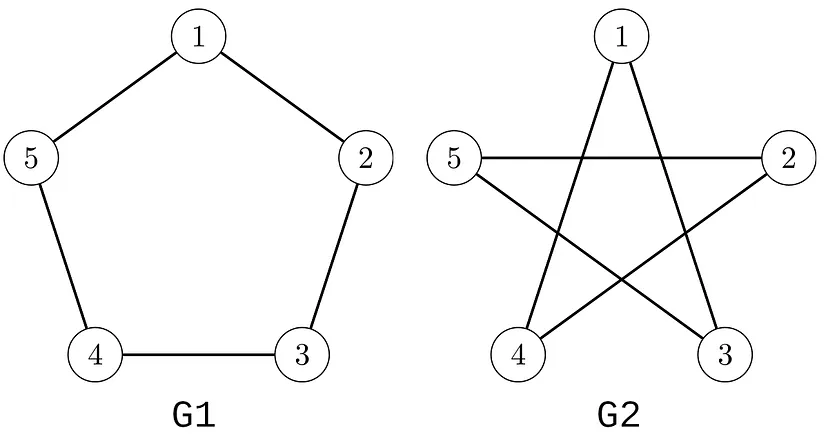 *Figure 1.1*


## Types of Graphs

***

**Undirected Graph**
In an undirected graph, nodes are connected by edges that are all bidirectional. For example if an edge coonnects node 1 and 2, we can traverse from node 1 to node 2. and from node 2 to 1.

**Directed Graph**
In a directed graph, nodes are connected by directed edges - they only go in one direction. For example, if an edge connects node 1 and 2, but the arrow head points towards 2, we can only traverse from node 1 to node 2 - not in the opposite direction.

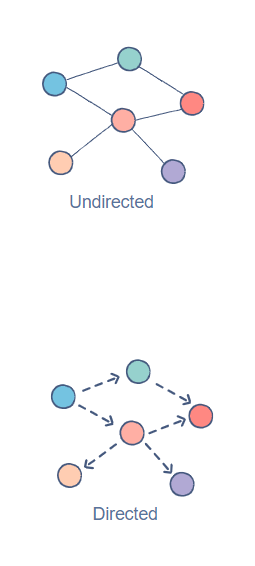


Graphs can be represented using an Adjacency Matrix, this is a 2D array of size VxV where V is the number of nodes. A slot `matrix[i][j] = 1` indicates that there is an edge from node i to node j.

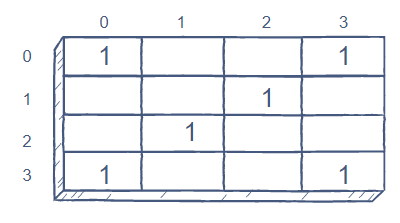

We use the Adjacency Matrix below to solve the graph isomorphism problem.

## How to solve the problem?

***

The following python code has the function “brute_force_test_graph_isomorphism”, which accepts as an arguments 2 adjacency matrix and returns True or False whether graphs are isomorphic or not. 

In [1]:
import itertools
import numpy as np


def get_graph_order(adj_matrix):
    if len(adj_matrix) != len(adj_matrix[0]):
        return -1
    else:
        return len(adj_matrix)


def get_degree_sequence(adj_matrix):
    degree_sequence = []
    for vertex in range(len(adj_matrix)):
        degree_sequence.append(sum(adj_matrix[vertex]))
    degree_sequence.sort(reverse=True)
    return degree_sequence


def get_all_vertex_permutations(adj_matrix):
    if get_graph_order(adj_matrix) > 8:
        print("This function is too inefficient for graph order > 8")
        return -1
    all_adj_matrix = []
    idx = list(range(len(adj_matrix)))
    possible_idx_combinations = [
        list(i) for i in itertools.permutations(idx, len(idx))
    ]
    for idx_comb in possible_idx_combinations:
        a = adj_matrix
        a = a[idx_comb]
        a = np.transpose(np.transpose(a)[idx_comb])
        all_adj_matrix.append({
            "perm_vertex":
            idx_comb,
            "adj_matrix":
            a
        })

    return all_adj_matrix


def brute_force_test_graph_isomporphism(adj_1, adj_2):
    degree_sequence_1 = get_degree_sequence(adj_1)
    degree_sequence_2 = get_degree_sequence(adj_2)
    if get_graph_order(adj_1) != get_graph_order(adj_1):
        return False
    elif np.array_equal(degree_sequence_1, degree_sequence_2) == False:
        return False
    else:
        for adj_matrix in list(
                map(lambda matrix: matrix["adj_matrix"],
                    get_all_vertex_permutations(adj_2))):
            if np.array_equal(adj_1, adj_matrix) == True:
                return True
    return False

This is the adjacency matrix for *Figure 1.1*:

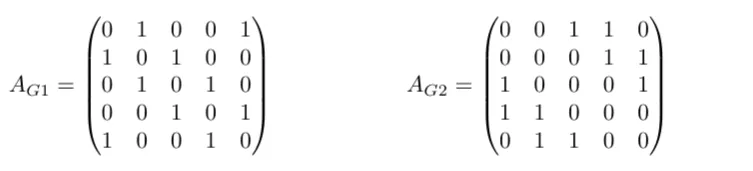 *Figure 1.2*

We first need to check that the vertex are the same for both, using function `get_graph_order` we should get output `5` for both.

Secondly we need to get the degree sequence, using function `get_degree_sequence`, this is got by arranging the vertex in non-increasing order.

Finally, using function `get_all_vertex_permutations` to generate all the possible vertex permuations for AG2 and compare if equal to AG1.
Since there is 5 vertex, 5! (120) possible permuatations to check.

The permutation of AG2 that transforms it to AG1 is the following:

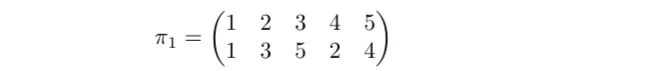

It means that if we relabel in G2 vertex 1 as 1, 2 as 3, 3 as 3, 4 as 2, 5 as 4, we end up as the same G1 graph.

## References

***

- http://www.dharwadker.org/tevet/isomorphism/
- https://towardsdatascience.com/testing-if-two-graphs-are-isomorphic-cf6c44ab551e
- https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570
- https://www.educative.io/answers/what-is-a-graph-data-structure